# K-means Clustering From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

### Step-1 Initialize K centroids at random place

In [2]:
def place_centroids(k, data):
    np.random.seed(42)
    indices = np.random.choice(data.shape[0], k, replace=False)
    
    return data[indices]
    

### Step 2: Compute distance of every point from the centroid and assign each data point to the closest centroid

In [3]:
def k_means_one_round(data, k, centroids, prev):
    n_points = data.shape[0]

    groups = np.full(n_points, -1, dtype=int)
    group_sums = {i: np.zeros(data.shape[1]) for i in range(k)}
    group_counts = {i: 0 for i in range(k)}

    for idx in range(n_points):
        x, y = data[idx]  
        min_distance = float('inf')
        closest_centroid = -1

        for i in range(k):
            cx, cy = centroids[i]
            distance = np.sqrt(np.square(cx - x) + np.square(cy - y))
            if distance < min_distance:
                min_distance = distance
                closest_centroid = i

        groups[idx] = closest_centroid
        group_sums[closest_centroid] += np.array([x, y])
        group_counts[closest_centroid] += 1

    new_centroids = []
    for i in range(k):
        if group_counts[i] > 0:
            new_centroid = group_sums[i] / group_counts[i]
        else:
            new_centroid = centroids[i]  
        new_centroids.append(new_centroid)

    changed_group_count = np.sum(prev != groups)

    return np.array(new_centroids), groups, changed_group_count




### Step 3: Repeat Until the grouping converges

In [4]:

def k_means(data, k, max_iter=300):
    centroids = place_centroids(k, data)
    prev_groups = np.full(data.shape[0], -1)

    for _ in range(max_iter):
        centroids, groups, changed_group_count = k_means_one_round(data, k, centroids, prev_groups)
        if changed_group_count == 0:  
            break
        prev_groups = groups

    return groups, centroids

    

In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Explanatory Data Analysis

<Axes: >

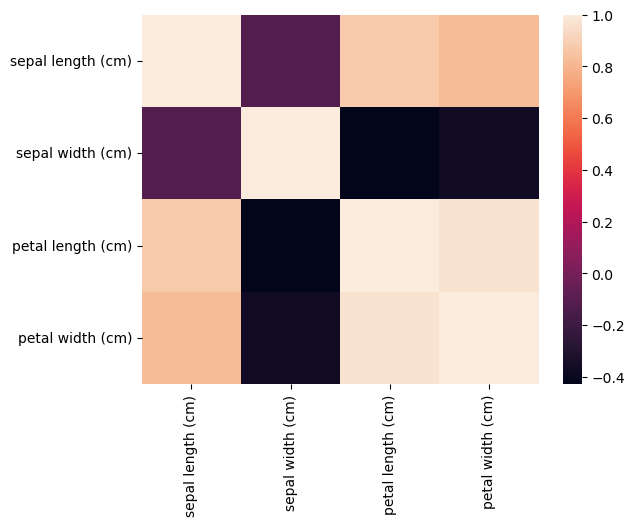

In [6]:
correlation = df.corr()
# plt.plot(df.corr())
sns.heatmap(correlation)

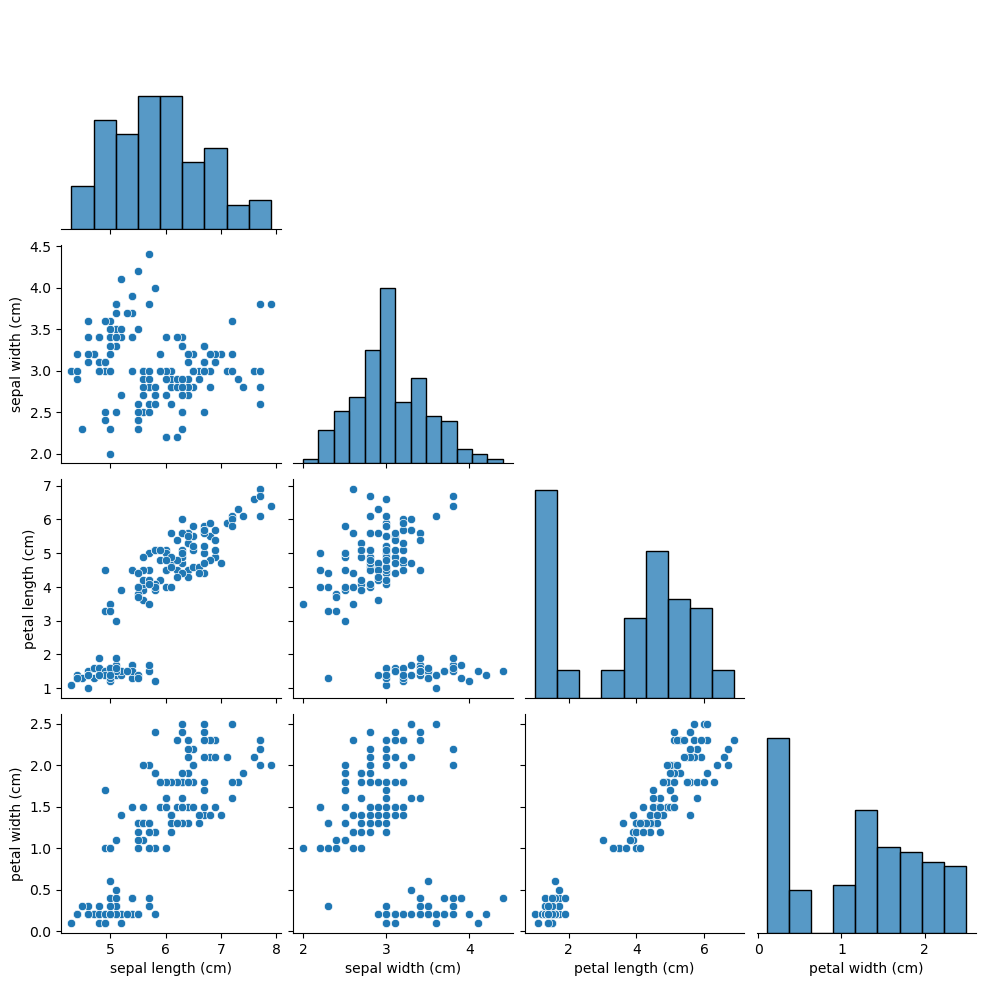

In [7]:

sns.pairplot(df, kind='scatter', corner=True)

In [8]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)

In [9]:
data_array = df.to_numpy()
data_array

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [10]:

labels, centroids = k_means(data_array, 3)

In [11]:
def draw_clusters(k, centroids, data: pd.DataFrame, labels):
    
    plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x' )
    df2 = data.copy()
    df2['flower'] = labels

    for i in range(k):
        group = df2[df2['flower'] == i]
        plt.scatter(group.iloc[:,0], group.iloc[:,1])




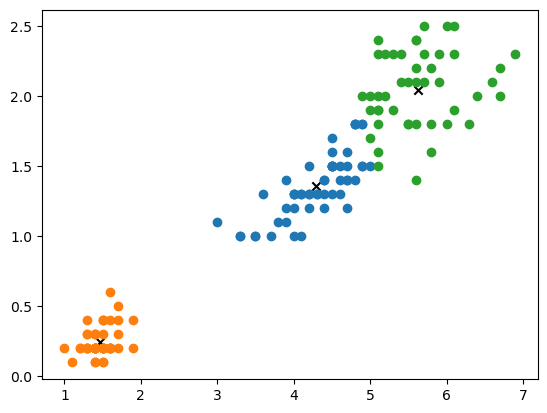

In [12]:

draw_clusters(3, centroids, df, labels)

## Choosing K

In [13]:
def calculate_sse(data, labels, centroids):
    sse = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[labels == i]
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

def elbow_method(data, max_k=10):
    sse_values = []
    for k in range(1, max_k + 1):
        labels, centroids = k_means(data, k)
        sse = calculate_sse(data, labels, centroids)
        sse_values.append(sse)
    return sse_values
        

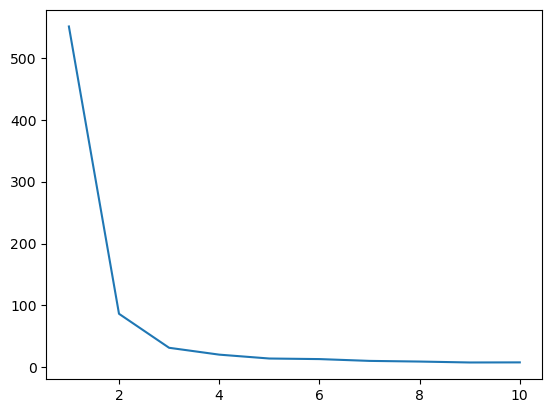

In [14]:
custom_k_means_sse = elbow_method(data_array, 10)
plt.plot(list(range(1, 11)), custom_k_means_sse)


#### Using the elbow method it is easy to see that 3 is the optimal K value.

### Comparing Custom K-means with sk-learn's K-means

In [15]:
from sklearn.cluster import KMeans

In [16]:
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

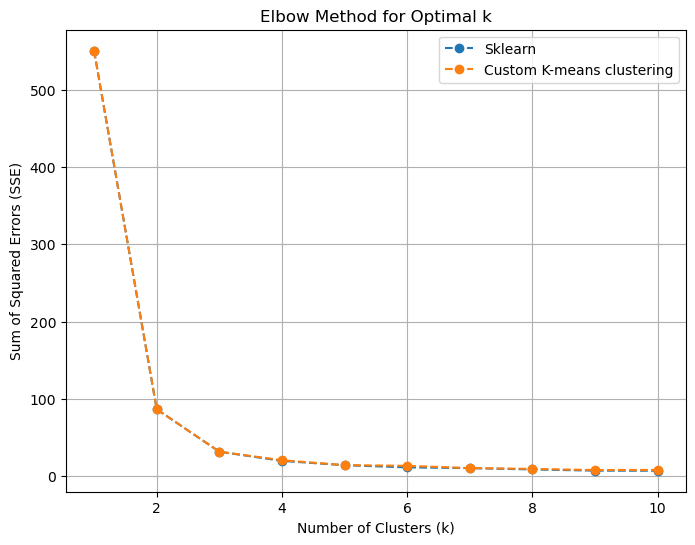

In [17]:

plt.figure(figsize=(8, 6))
plt.plot(k_rng, sse, marker='o', linestyle='--')
plt.plot(k_rng, custom_k_means_sse, marker='o', linestyle='--')
plt.legend(["Sklearn", "Custom K-means clustering"])
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid()
plt.show()
